# Introduction to R - Part 2
In the first part we've seen how and what ype of data can be stored in R and what are some basic mathematical operations that can be performed on them. This part will focus on more functional aspects of R, i.e. reading and manipulating data sets.  
The following topics will be covered:
1. Relational and advanced vector operators
2. Control statements in R: decision making and looping
3. Functions and packages
    1. Defining your own functions
    2. Functions included in base R
    3. Using function from other packages
4. Reading data from external files

## 1. Relational and advanced vector operators
Operator |  Description
---------|---------------------------------------------------------
<        | Less than
<=       | Less than or equal
>        | Greater than
>=       | Greater than or equal
==       | Equality
!=       | Inequality
%%       | Remainder of vector on the left with vector on the right
%/%      | Division of vector on the left by vector on the right
%in%     | Identify element on left side of operator in vector on right side
%\*%     | Matrix multiplication

## 2. Control statements in R
In the previous part we have seen how to manipulate variables and store data or meta-data in them. However, the point in having data stored in variables is to do something with them and this can be achieved in a number of ways. R has a rich collection of function packages (curated on [The Comprehensive R Archive Network](https://cran.r-project.org)) offering functions that perform specific tasks (e.g. the ```boot``` package contains functions allowing easy bootstrapping methods, ```ggplot2``` is used for data plotting, ```dplyr``` allows for fast data manipulation, ```mada``` provides help with meta-analyses). However, when a function is not already available, we can use classical programming approaches to write it. Variables and data storage is one part of such a strategy. Using control statements is another. 

One such control statement is the conditional statement ```if (...) {} else {}```. The statement in the round brackets has to be a logical expression. If that expression evaluates to TRUE, the statements in the first set of curly brackets are executed. If the conditional expression evaluates to FALSE, the statements in the second pair of curly brackets are executed. Note that an ```else``` branch is not mandatory.

In [4]:
steatosisStage <- c("S0", "S0", "S2", "S1", "S2", "S0", "S1", "S3", "S1", "S2", "S3")
if ("S1" %in% steatosisStage) {
    print("There are patients with steatosis grade 1.")
} else {
    print("There are no patients with steatosis grade 1")
}

[1] "There are patients with steatosis grade 1."


Looping statements are designed to perform the same task multiple times depending on some criterion. R offers the ```while```, and ```for``` loops for this purpose. ```while``` loops are testing a logical expression before executing the task that needs to be repeated and are typically used in cases where the number of necessary repetitions is not known in advance (e.g. the Euclidean algorithm to determine the greatest common divisor). When the number of repetitions is known in advance (e.g. data stored in an array has to be plotted and the size of the array is known), a ```for``` loop is used. Two examples below demonstrate the difference between the two looping structures.

In [16]:
# We are going to generate the first n Fibonacci numbers
# using a while loop.
counter <- 0
fibo1 <- 1
fibo2 <- 1
aux <- 0
n <- 10
if (n == 1) {
    print(fibo1)
} else {
    while (counter < n) {
        if (counter == 0) {
            print(fibo1)
            print(fibo2)
            counter <- counter + 2
        }
        aux <- fibo2
        fibo2 <- fibo1 + fibo2
        fibo1 <- aux
        print(fibo2)
        counter <- counter + 1
    }
}

[1] 1
[1] 1
[1] 2
[1] 3
[1] 5
[1] 8
[1] 13
[1] 21
[1] 34
[1] 55


In [9]:
# This is an inefficient way of generating squares of integers,
# but it is a good illustration of how the for loop works.
v <- c(1, 2, 3, 4, 5, 6, 7)
for (idx in v) {
    print(idx ^ 2)
}

[1] 1
[1] 4
[1] 9
[1] 16
[1] 25
[1] 36
[1] 49


In [ ]:
# What would be a more efficient and elegant way of printing all the perfect squares that are less than 50?
# Fill in the blanks. Hint: there is no need for more than these two lines of code.
v <- seq(...)
print(...)

It is possible to interrupt the execution of a loop by using the ```break``` statement. Conversely, it is possible to skip an iteration and jump to the next one (or outside the loop if the looping condition is no longer TRUE) by using the ```next``` statement.

## 3. Functions and packages
### A. Defining your own functions
Functions are program units that perform a well-defined task. The need to organise code into functions arises when a particular task needs to be repeated throughout a code. Functions are also helpful for structuring a code and increasing readability for yourself and other users.  
In R function definitions are described in the following way:  
```
functionName <- function(argument1, argument2, argument3=1...) {
   functionBody
   returnStatement
}
```  
Let's now examine the different parts of a function as given above:  
* ```functionName``` - is an arbitrary name chosen to refer to the function. This name will be used throughout the code whenever a function call is necessary.
* ```argument1, argument2, argument3=1, ...``` - these are arguments of the function and are used to pass on information to the function. These placeholders are populated with actual values (numeric, logical etc.) when the function is called. Some functions may not have any arguments at all, and some arguments may be pre-defined, i.e. they can have default values, like ```argument3```.
* ```functionBody``` - contains the code of the function that will perform a specific task.
* ```returnStatement``` - While in most programming languages the return value has to be preceded by a specific keyword, in R it is the last statement in the body of the function that constitutes the return value of the function.  

Let's now take a look at a real-world function. Assuming that you have a data set with patients' blood test results, you realise that the cholesterol measurements (LDL, HDL and total) are all in mmol/l but you need them to be in mg/dl for a reporting software. Having all the data loaded into R, it will be easier to write a function that does the conversion than to do it manually. Luckily, all three cholesterol types can be converted between the two units using the same formula.
Below is an example of how we could convert from mmol/l to mg/dl.

In [18]:
cholesterolMmolToMg <- function(value) {
    value * 38.67
}

In [25]:
cholesterolMmolToMg <- function(value) {
    value * 38.67
}
totalCholesterol <- c(5.59, 5.69, 4.60, 5.43, 6.05, 5.51, 4.91, 4.06, 5.46, 5.48)
cholesterolMmolToMg(totalCholesterol)

[1] 216.1653 220.0323 177.8820 209.9781 233.9535 213.0717 189.8697 157.0002
 [9] 211.1382 211.9116

For the sake of completeness, let's also consider having the reverse operation, i.e. going from mg/dl to mmol/l. A function performing this task can be written in a very similar fashion to the one above.

__Q__: Having too many functions can sometime lead to code fragmentation and, especially for complementary operations like unit conversions, it is possible to merge the two functionalities in a single function. Write a function that converts a given value into mmol/l or mg/dl, by using a second argument that indicates the unit to convert into.

In [17]:
cholesterolUnitChange <- function(value, direction) {
    ...
}

__Q__: Can we pass on a vector to this function? If yes, what happens if one or more elements of that vector are NA?

In [ ]:
totalCholesterol <- c(5.59, 5.69, 4.60, 5.43, 6.05, 5.51, 4.91, 4.06, 5.46, 5.48)  # In mmol/l
totalCholesterolMg <- cholesterolUnitChange(totalCholesterol, "mg/dl")

totalCholesterolIncomplete <- c(5.59, 5.69, 4.60, 5.43, NA, 5.51, 4.91, NA, 5.46, 5.48)  # In mmol/l
totalCholesterolMg <- cholesterolUnitChange(totalCholesterolIncomplete, "mg/dl")

### B. Functions included in base R
The base package (loaded automatically whenever you start R) contains a whole host of utility functions that can be used in day-to-day data manipulation tasks.  
The list below contains some of the more frequently used functions along with a brief description of how they work.

* __sort(vectorName, decreasing=FALSE)__ - Sorts the elements of a vector in increasing order. If decreasing is set to TRUE, the function will sort the elements of the vector in decreasing order.
* __unlit(listName)__ - transforms a list into a vector. If list elements are of different types, they will be converted in the more "permissive" data type. E.g. if there are numeric and character/string elements in a list, the resulting vector will contain string elements. If there are numeric and logical elements, the resulting vector will contain numeric elements. If there are string and logical elements, the resulting vector will contain string elements.
* __apply(arrayName, margin, functionName)__ - A function is applied to elements of an array or matrix. The subset of elements across which to apply the function are determined by margin, which can be 1 for rows, 2 for columns, c(1, 2) for rows and columns etc. Example: assuming myArray is a 3x3x2 array, ```apply(myArray, c(1), mean)``` will return the means across rows in the two matrices in myArray.
* __lapply(listName, functionName)__ - Applies a function on list elements and returns the result as a list.
* __sapply(dataStructureName, functionName)__ - Applies a function on a vector, list or data frame and returns a vector or matrix.
* __tapply(dataStuctureName, index, functionName)__ - Applies a function on all factors in dataStructureName; the factors to cover are in a list called index.
* __is.numeric(x)__, __is.double(x)__, __is.logical(x)__, etc. - These functions check whether x is of a certain data type (or structure). If so, the functions return TRUE, otherwise they return FALSE.
* __as.numeric(x)__, __as.logical(x)__, etc. - These functions convert x into a certain data type (or structure). If conversion is not possible (e.g. from character to numeric), NA is returned along with a warning message.
* __str(dataStructureName)__ - Displays the structure of an R data structure
* __summary(dataStructureName)__ - Displays statistical summaries of a data set.

### C. Using functions from other packages
While R comes with a large number of built-in packages (see a list [here](https://www.tutorialspoint.com/r/r_packages.htm)), it is sometimes necessary to have additional functionality, provided by third-party packages.  
New packages can be installed with:

In [20]:
install.packages("ggplot2")

Installing package into 'C:/Users/Ferenc Mozes/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'processx', 'rprojroot', 'pkgbuild', 'diffobj', 'rematch2', 'brio', 'callr', 'cli', 'desc', 'ellipsis', 'lifecycle', 'pkgload', 'praise', 'ps', 'rlang', 'waldo', 'withr', 'testthat', 'isoband'



package 'processx' successfully unpacked and MD5 sums checked
package 'rprojroot' successfully unpacked and MD5 sums checked
package 'pkgbuild' successfully unpacked and MD5 sums checked
package 'diffobj' successfully unpacked and MD5 sums checked
package 'rematch2' successfully unpacked and MD5 sums checked
package 'brio' successfully unpacked and MD5 sums checked
package 'callr' successfully unpacked and MD5 sums checked
package 'cli' successfully unpacked and MD5 sums checked
package 'desc' successfully unpacked and MD5 sums checked
package 'ellipsis' successfully unpacked and MD5 sums checked
package 'lifecycle' successfully unpacked and MD5 sums checked
package 'pkgload' successfully unpacked and MD5 sums checked
package 'praise' successfully unpacked and MD5 sums checked
package 'ps' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'waldo' successfully unpacked and MD5 sums checked
package 'withr' successfully unpacked 

Now the ```ggplot2``` package is installed on the computer. To allow R to use its functions, the package needs to be loaded:

In [22]:
library("ggplot2")

Now we all functions packaged in ```ggplot2``` are available and can be used. As ```ggplot2``` is a graphics and plotting package, let's try out how it works. We will define a vector and use a scatterplot to represent it graphically.

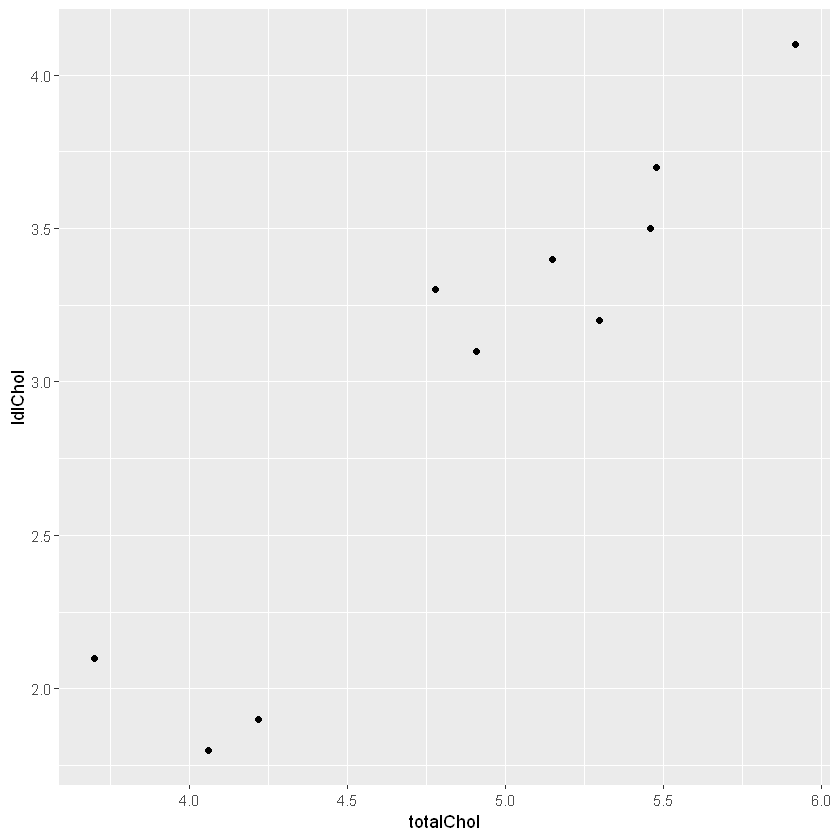

In [30]:
# We will define a data frame with total and LDL cholesterol measured in 10 patients and plot
# LDL cholesterol against total cholesterol.
totalCholesterol <- data.frame(totalChol <- c(4.06, 5.46, 5.48, 3.70, 4.91, 4.78, 5.30, 5.92, 4.22, 5.15),
                              ldlChol <- c(1.8, 3.5, 3.7, 2.1, 3.1, 3.3, 3.2, 4.1, 1.9, 3.4))
ggplot(totalCholesterol, aes(x=totalChol, y=ldlChol)) + geom_point()

R packages always come with a documentation detailing functions available in that package. The [CRAN](https://cran.r-project.org/) repository will contain these documentation for each package.

### 4. Reading data from external files